IGRAPH U--- 4 4 --
+ edges:
0--1 0--2 1--3 2--3


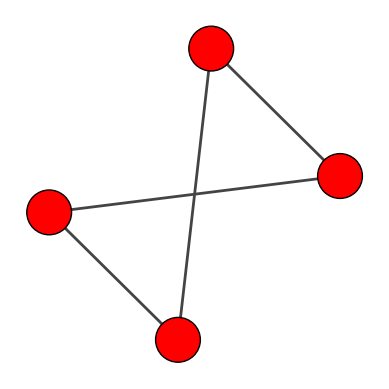

In [21]:
import igraph as ig
# import pycairo 
import matplotlib.pyplot as plt
#指定节点数量和连边列表的方式创建一个简单图
g = ig.Graph(n=4,edges=[[0,1],[0,2],[1,3],[2,3]])
print(g)
ig.plot(g,bbox=(300,300)) #后边这个是调整绘图区域大小的
plt.show()

In [ ]:
python -m ipykernel install --user --name python_igraph --display-name python_igraph

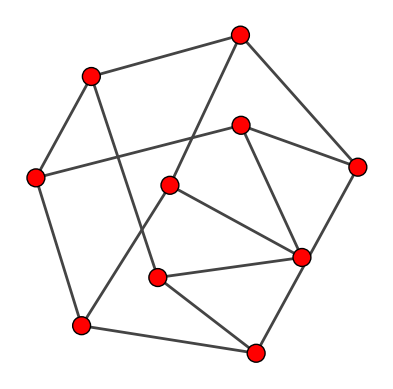

In [20]:
import matplotlib.pyplot as plt
import igraph as ig
ig.config["plotting.backend"] = "matplotlib"
g = ig.Graph.Famous("petersen")
ig.plot(g)
plt.show()

In [25]:
# import matplotlib.pyplot as plt
# import igraph as ig
# g = ig.Graph(n=4,edges=[[0,1],[2,3]],edge_attrs={'weight':[0.1,0.2]},vertex_attrs ={'color':['b','g','g','y']})
# ig.plot(g)
# plt.show()

In [25]:
import igraph as ig
ig.config["plotting.backend"] = "matplotlib"
ig.config.save()

In [26]:
# import matplotlib.pyplot as plt
# import igraph as ig
# g = ig.Graph(n=4,edges=[[0,1],[2,3]],edge_attrs={'weight':[0.1,0.2]},vertex_attrs ={'color':['b','g','g','y']})
# ig.plot(g)
# plt.show()

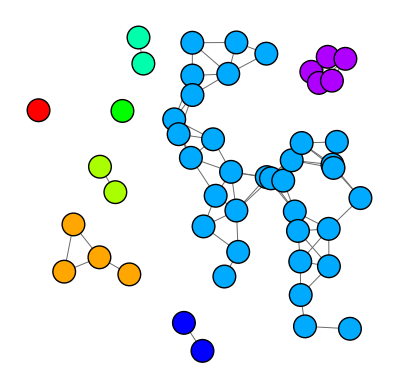

In [31]:
import igraph as ig
import matplotlib.pyplot as plt
import random
random.seed(0)
g = ig.Graph.GRG(50, 0.15)
components = g.connected_components(mode='weak')
fig, ax = plt.subplots()
ig.plot(
    components,
    target=ax,
    palette=ig.RainbowPalette(),
    vertex_size=0.07,
    vertex_color=list(map(int, ig.rescale(components.membership, (0, 200), clamp=True))),
    edge_width=0.7
)
plt.show()

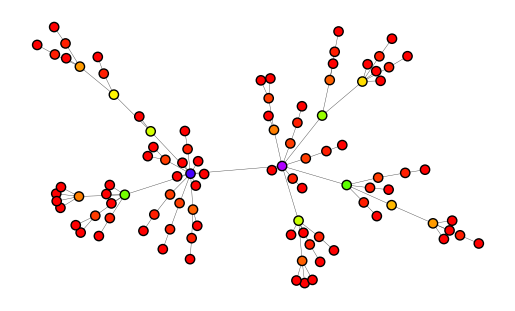

In [35]:
import igraph as ig
import matplotlib.pyplot as plt
import random
ig.config["plotting.backend"] = "matplotlib"
ig.config["plotting.layout"] = "fruchterman_reingold"
ig.config["plotting.palette"] = "rainbow"
# ig.config.save()
random.seed(1)
g = ig.Graph.Barabasi(n=100, m=1)
betweenness = g.betweenness()
colors = [int(i * 200 / max(betweenness)) for i in betweenness]
ig.plot(g, vertex_color=colors, vertex_size=1, edge_width=0.3)
plt.show()


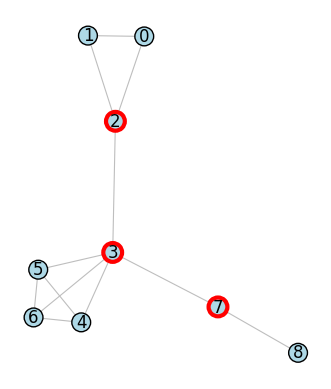

In [38]:
import igraph as ig
import matplotlib.pyplot as plt
g = ig.Graph.Formula(
    "0-1-2-0, 3:4:5:6 - 3:4:5:6, 2-3-7-8",
)
articulation_points = g.vs[g.articulation_points()]
fig, ax = plt.subplots()
ig.plot(
    g, 
    target=ax, 
    vertex_size=0.3,
    vertex_color="lightblue",
    vertex_label=range(g.vcount()),
    vertex_frame_color = ["red" if v in articulation_points else "black" for v in g.vs],
    vertex_frame_width = [3 if v in articulation_points else 1 for v in g.vs],
    edge_width=0.8,
    edge_color='gray'
)
plt.show()

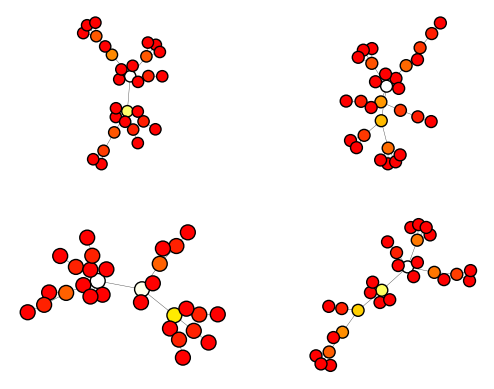

In [39]:
import igraph as ig
import matplotlib.pyplot as plt
import random
visual_style = {
    "edge_width": 0.3,
    "vertex_size": 1.5,
    "palette": "heat",
    "layout": "fruchterman_reingold"
}
random.seed(1)
gs = [ig.Graph.Barabasi(n=30, m=1) for i in range(4)]
betweenness = [g.betweenness() for g in gs]
colors = [[int(i * 255 / max(btw)) for i in btw] for btw in betweenness]
fig, axs = plt.subplots(2, 2)
axs = axs.ravel()
for g, color, ax in zip(gs, colors, axs):
    ig.plot(g, target=ax, vertex_color=color, **visual_style)
plt.show()

Max flow: 6.0
Edge assignments: [1.0, 5.0, 1.0, 2.0, 3.0, 3.0, 3.0]


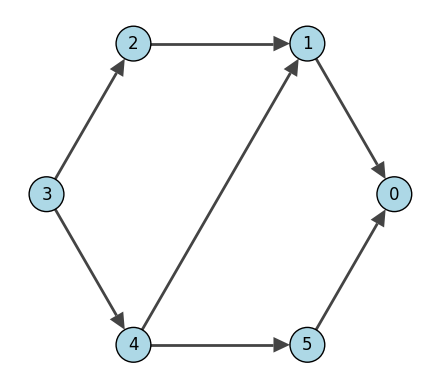

In [40]:
import igraph as ig
import matplotlib.pyplot as plt
g = ig.Graph(
    6,
    [(3, 2), (3, 4), (2, 1), (4,1), (4, 5), (1, 0), (5, 0)],
    directed=True
)
g.es["capacity"] = [7, 8, 1, 2, 3, 4, 5]
flow = g.maxflow(3, 0, capacity=g.es["capacity"])

print("Max flow:", flow.value)
print("Edge assignments:", flow.flow)
fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    layout="circle",
    vertex_label=range(g.vcount()),
    vertex_color="lightblue"
)
plt.show()

Minimum edge weight sum: 201


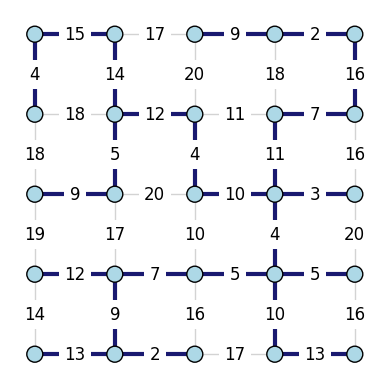

In [41]:
import random
import igraph as ig
import matplotlib.pyplot as plt
random.seed(0)
g = ig.Graph.Lattice([5, 5], circular=False)
g.es["weight"] = [random.randint(1, 20) for _ in g.es]
mst_edges = g.spanning_tree(weights=g.es["weight"], return_tree=False)
print("Minimum edge weight sum:", sum(g.es[mst_edges]["weight"]))
g.es["color"] = "lightgray"
g.es[mst_edges]["color"] = "midnightblue"
g.es["width"] = 1.0
g.es[mst_edges]["width"] = 3.0

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    layout="grid",
    vertex_color="lightblue",
    edge_width=g.es["width"],
    edge_label=g.es["weight"],
    edge_background="white",
)
plt.show()

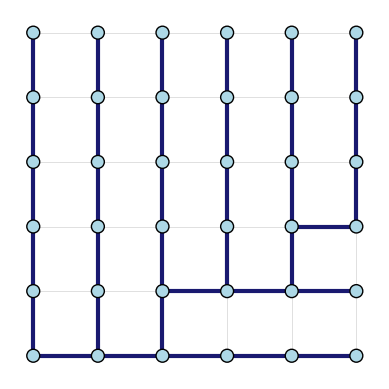

In [42]:
import igraph as ig
import matplotlib.pyplot as plt
import random
g = ig.Graph.Lattice([6, 6], circular=False)
layout = g.layout("grid")
random.seed(0)
permutation = list(range(g.vcount()))
random.shuffle(permutation)
g = g.permute_vertices(permutation)
new_layout = g.layout("grid")
for i in range(36):
    new_layout[permutation[i]] = layout[i]
layout = new_layout
spanning_tree = g.spanning_tree(weights=None, return_tree=False)
g.es["color"] = "lightgray"
g.es[spanning_tree]["color"] = "midnightblue"
g.es["width"] = 0.5
g.es[spanning_tree]["width"] = 3.0

fig, ax = plt.subplots()
ig.plot(
    g,
    target=ax,
    layout=layout,
    vertex_color="lightblue",
    edge_width=g.es["width"]
)
plt.show()

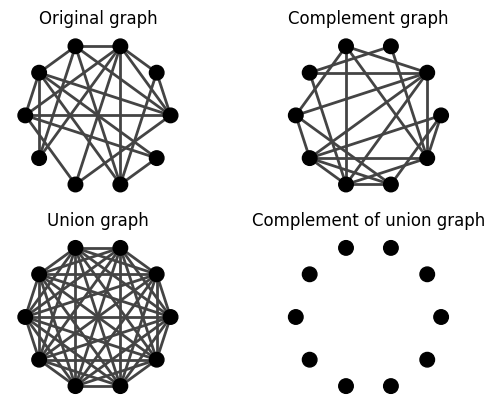

In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import random
random.seed(0)
g1 = ig.Graph.Erdos_Renyi(n=10, p=0.5)
g2 = g1.complementer(loops=False)
g_full = g1 | g2
g_empty = g_full.complementer(loops=False)
fig, axs = plt.subplots(2, 2)
ig.plot(
    g1,
    target=axs[0, 0],
    layout="circle",
    vertex_color="black",
)
axs[0, 0].set_title('Original graph')
ig.plot(
    g2,
    target=axs[0, 1],
    layout="circle",
    vertex_color="black",
)
axs[0, 1].set_title('Complement graph')

ig.plot(
    g_full,
    target=axs[1, 0],
    layout="circle",
    vertex_color="black",
)
axs[1, 0].set_title('Union graph')
ig.plot(
    g_empty,
    target=axs[1, 1],
    layout="circle",
    vertex_color="black",
)
axs[1, 1].set_title('Complement of union graph')
plt.show()

Matching is:
0 - 5
1 - 7
2 - 8
3 - 6
4 - None
Size of maximum matching is: 4


<AxesSubplot:>

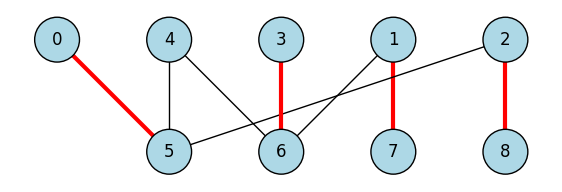

In [45]:
import igraph as ig
import matplotlib.pyplot as plt
g = ig.Graph.Bipartite(
    [0, 0, 0, 0, 0, 1, 1, 1, 1],
    [(0, 5), (1, 6), (1, 7), (2, 5), (2, 8), (3, 6), (4, 5), (4, 6)]
)
assert g.is_bipartite()
matching = g.maximum_bipartite_matching()
matching_size = 0
print("Matching is:")
for i in range(5):
    print(f"{i} - {matching.match_of(i)}")
    if matching.is_matched(i):
        matching_size += 1
print("Size of maximum matching is:", matching_size)
fig, ax = plt.subplots(figsize=(7, 3))
ig.plot(
    g,
    target=ax,
    layout=g.layout_bipartite(),
    vertex_size=0.4,
    vertex_label=range(g.vcount()),
    vertex_color="lightblue",
    edge_width=[3 if e.target == matching.match_of(e.source) else 1.0 for e in g.es],
    edge_color=["red" if e.target == matching.match_of(e.source) else "black" for e in g.es]
)

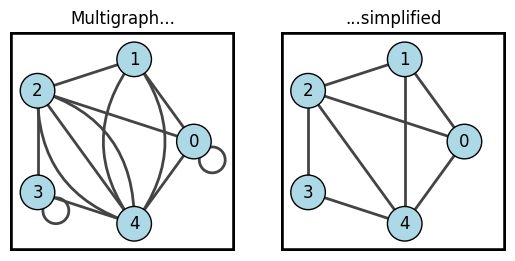

In [46]:
import matplotlib.pyplot as plt
import igraph as ig
g1 = ig.Graph([
    (0, 1),
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 0),
    (0, 0),
    (1, 4),
    (1, 4),
    (0, 2),
    (2, 4),
    (2, 4),
    (2, 4),
    (3, 3)],
)
g2 = g1.copy()
g2.simplify()
visual_style = {
    "vertex_color": "lightblue",
    "vertex_size": 0.4,
    "vertex_label": [0, 1, 2, 3, 4],
}
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True)
ig.plot(
    g1,
    layout="circle",
    target=axs[0],
    **visual_style,
)
ig.plot(
    g2,
    layout="circle",
    target=axs[1],
    **visual_style,
)
axs[0].set_title('Multigraph...')
axs[1].set_title('...simplified')
# Draw rectangles around axes
axs[0].add_patch(plt.Rectangle(
    (0, 0), 1, 1, fc='none', ec='k', lw=4, transform=axs[0].transAxes,
    ))
axs[1].add_patch(plt.Rectangle(
    (0, 0), 1, 1, fc='none', ec='k', lw=4, transform=axs[1].transAxes,
    ))
plt.show()

In [ ]:
import igraph as ig
import matplotlib.pyplot as plt
g = ig.Graph(
    edges=[(0, 1), (0, 2), (1, 3), (2, 4), (4, 3), (3, 5), (4, 5)],
    directed=True,
)
assert g.is_dag
results = g.topological_sorting(mode='out')
print('Topological sort of g (out):', *results)
results = g.topological_sorting(mode='in')
print('Topological sort of g (in):', *results)


In [1]:
#查看库的版本，在不同的虚拟环境安装不同版本，进行切换
#方法一：pip show igraph
#方法二：
import igraph
print(igraph.__version__)

0.10.3


IGRAPH U--- 4 4 --
+ edges:
0--1 0--2 1--3 2--3


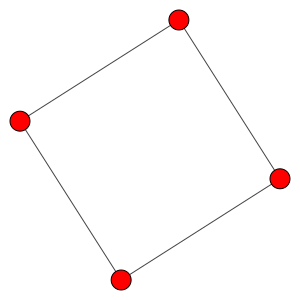

In [11]:
#官网：https://igraph.org
#第一节
import igraph as ig
#以指定节点数量和连边列表的方式创建一个简单图
g = ig.Graph(n=4,edges=[[0,1],[0,2],[1,3],[2,3]])
print(g)
ig.plot(g,bbox=(300,300))

IGRAPH U--- 3 3 --
+ edges:
0--1 0--2 1--2


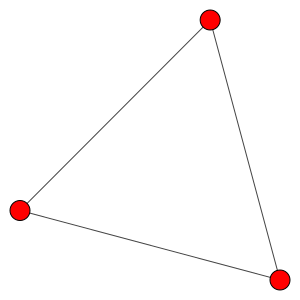

In [13]:
#创建一个空图，并为其增加节点和连边
g = ig.Graph()
#增加节点和连边
g.add_vertices(3) #增加三个节点0，1，2
g.add_edges([(0,1),(0,2),(1,2)])
print(g)
ig.plot(g,bbox=(300,300))
#使用字典指定边权值（或任何其他顶点/边属性）#切换版本试一试
# g = ig.Graph(
#     n=4,edges=[[0,1],[2,3]],
#     edge_attrs={'weight':[[0,1],[2,3]]},#连边的权重
#     vertex_attrs={'color':['b','g','g','y']}#节点的颜色
# )
# print(g)
# ig.plot(g,bbox=(300,300))


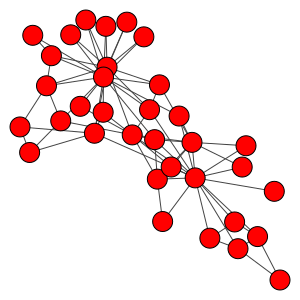

In [19]:
#生成库中自带的经典网络（第二节详细介绍）
g = ig.Graph.Famous('Zachary')
ig.plot(g,bbox=(300,300))

# # ##以及库中其他的经典图
# g = ig.Graph.Full(n=3)
# g = ig.Graph.Lattice(dim=[3,3],circular=False)
# g = ig.Graph.Ring(n=4,circular=False)
# g = ig.Graph.GRG(100,0.2)

# ig.plot(g,bbox=(300,300))

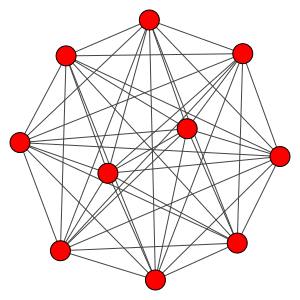

In [20]:
#第二节 使用库函数生成经典的网络
import igraph as ig
#生成完全网络
g = ig.Graph.Full(n=10)
ig.plot(g,bbox=(300,300))
#后期会介绍布局，这里的完全网络体现在ig.Graph.Full

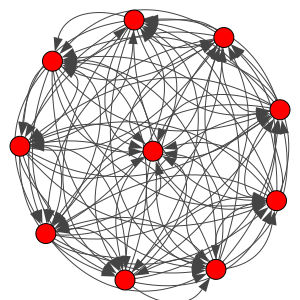

In [22]:
g = ig.Graph.Full(n=10,directed=True) #有向,指定directed=True，就会使得绘制的连边带有方向
ig.plot(g,bbox=(300,300))

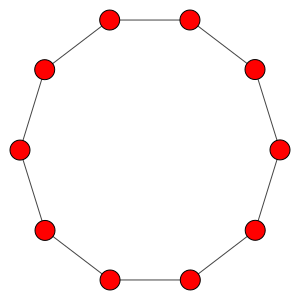

In [26]:
#生成一维环（分为具有周期性边界条件和不具有周期性边界条件）
g = ig.Graph.Ring(n=10,circular=False) #circular表示是否使用周期性边界条件（T就是使用，F就是不用得到的就是一个链），周期性边界条件就是首尾相连形成一个环
ig.plot(g,bbox=(300,300))
g = ig.Graph.Ring(n=10,circular=True) #指定边界条件
ig.plot(g,bbox=(300,300))

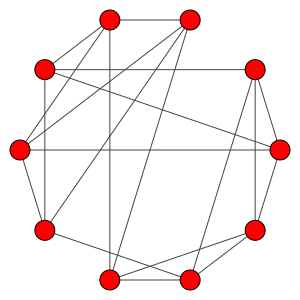

In [46]:
#k近邻耦合网络，每个节点的度是一样的是k
from IPython.display import Image
# Image(filename ='./attached files/K_Regular.png',width=600,height=300) #转到官网上查看，n是节点数量，k是每个节点的平均度，每个节点和它附近的二分枝k个节点相连

g = ig.Graph.K_Regular(n=10,k=4)
ig.plot(g,layout='circle',bbox=(300,300))



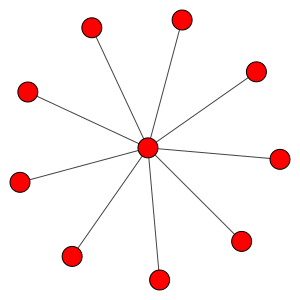

In [47]:
#星型网络
# n:节点的数量，mode分为有效和无效，center指定中心节点的标号
g = ig.Graph.Star(10)
ig.plot(g,bbox=(300,300))

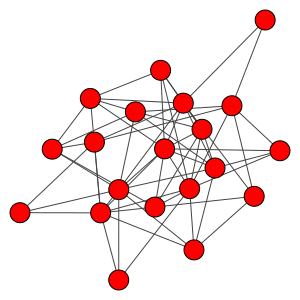

In [54]:
#ER随机网络
#参数：n,p，m
#若指定了n,p，就相当于用的是gnp模型，节点数量和连边概念
#若指定了n,m，就得到了gnm模型
# g = ig.Graph.Erdos_Renyi(n=20,p=0.3) #类似于NetworkX中的gnp模型
g = ig.Graph.Erdos_Renyi(n=20,m=60) #类似于NetworkX中的gnm模型,注意要写上具体的数，m=n*30会报错，还要添上关键字参数
ig.plot(g,bbox=(300,300))






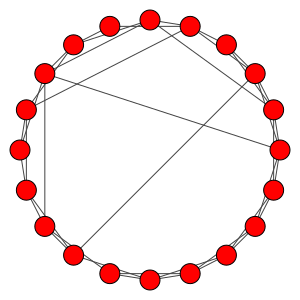

In [55]:
#WS小世界网络模型
#参数：dim(维度),size（节点数量）,nei（近邻节点）,p（重连边概率）,loops,mutiple
g = ig.Graph.Watts_Strogatz(dim=1,size=20,nei=2,p=0.1)
ig.plot(g,layout='circle',bbox=(300,300))

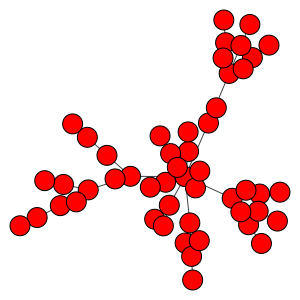

In [57]:
#BA-无标度网络
#参数：n,m，outpref,directed,power

g = ig.Graph.Barabasi(n=50,m=1) #若m=2，意思是生成的网络每一步增加的节点与先前2个节点相连
ig.plot(g,bbox=(300,300))



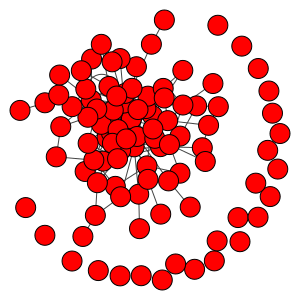

In [60]:
#随机增长网络,每一次增加一个节点，节点不具有择优的特性，它是和已经存在的节点随机找m个相连
#参数：n,m,directed,citation
n = 100
m =2
g = ig.Graph.Growing_Random(n=n,m=m)
ig.plot(g,bbox=(300,300))




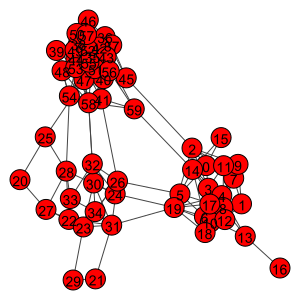

In [61]:
#随机块网络
#参数：n,pref_matrix,blok_sizes,directed,loops
n = 60 #指定总节点的数量
block_sizes = [20,15,25] #每个块的节点的数量
pref_matrix = [[0.25,0.01,0.01],[0.01,0.35,0.02],[0.01,0.02,0.40]] #块与块之间连接的矩阵，连边概念的矩阵，
# 这个概率矩阵的对角线元素就指的是每一个块内部连边概率，其他的元素指的是不同块之间连边的概率；快的内部连边的概率较大，对角线概率设置的较高；
# 非对角线元素，即块与块之间的连边概率较小。
g = ig.Graph.SBM(n,pref_matrix,block_sizes)
#设置标签
g.vs['label'] = range(len(g.vs))
ig.plot(g,bbox=(300,300))






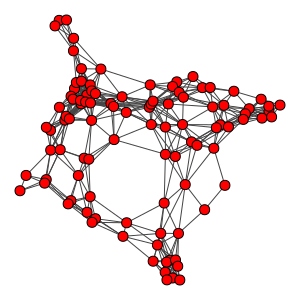

In [63]:
#随机几何网络
#参数：n,radius,torus
g = ig.Graph.GRG(100,0.2)
ig.plot(g,vertex_size=10,bbox=(300,300))
#相当于节点分布在正方形内，每两个节点之间的距离满足一定的条件就相连，通常指的是比设置的 半径小的时候相连

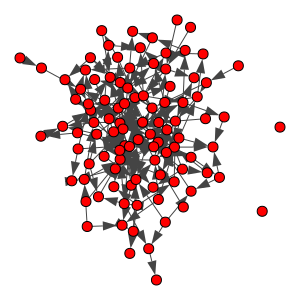

In [67]:
#生成具体指定幂律度分布的非增长无标度网络
#参数：n节点数量 ,m连边数量，exponent_out度指数,exponent_in（负数为无向的网络，是静态的无标度网络）
# g = ig.Graph.Static_Power_Law(100,200,exponent_out=2.5,exponent_in=-1)
# ig.plot(g,vertex_size=10,bbox=(300,300))

g = ig.Graph.Static_Power_Law(100,200,exponent_out=2.5,exponent_in=2.1)#生成有向网络
ig.plot(g,vertex_size=10,bbox=(300,300))



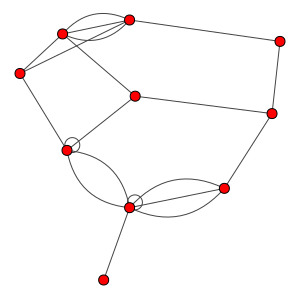

In [68]:
#生成具有给定度序列的图
#参数：out,in,method
g =ig.Graph.Degree_Sequence(out=[2,3,1,5,8,3,3,4,5,6])
ig.plot(g,vertex_size=10,bbox=(300,300))
#注意生成的网络可能包含着环



In [ ]:
#更多经典网络的生成见官方手册
#在官方网址下面查找generation
#函数的说明文档只有2020版Pdf，对应0.8版本,可以查找详细文档

In [69]:
#第三节 网络数据的读取与保存
import igraph as ig
print(ig.__version__)

0.9.11


In [72]:
#从邻接矩阵创建一个图
#无权情况：就是普通的0-1矩阵
# g = ig.Graph.Adjacency([[0,1,1],[1,0,1],[1,1,0]])
#加权情况，不只是0-1值得矩阵
g = ig.Graph.Weighted_Adjacency([[0,2,1],[2,0,0],[1,0,0]])

In [78]:
#将图保存为文件，如邻接矩阵或连边
g =ig.Graph.Erdos_Renyi(n=20,p=0.3,directed=False)
g.write_adjacency("F:/network/igraph/AD.dat",eol='\n')
#或者csv格式
g.write_adjacency("F:/network/igraph/AD.csv",sep=',')
#保存为连边的格式，保存的文件，就是连边是两列数据，第一列是原节点，第二列是目标节点
g.write_edgelist("F:/network/igraph/edgelist1.dat")

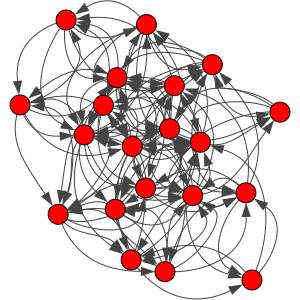

In [82]:
#加载外部文件生成图
#读取邻接矩阵
g =ig.Graph.Read_Adjacency("F:/network/igraph/AD.dat",directed=False) #注意这里是dat,而且这种方式绘制的是双向边（即为无向），每一对 节点之间的连边都用两条双向边来表示
ig.plot(g,bbox=(300,300))
#目前未找到以邻接矩阵读入后，绘制的是单向边


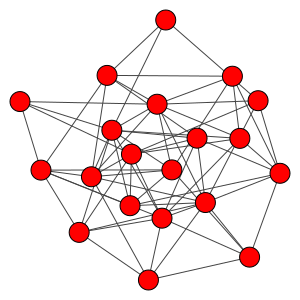

In [84]:
#加载连边，来绘制网络
g =ig.Graph.Read_Edgelist("F:/network/igraph/edgelist1.dat",directed=False)
ig.plot(g,bbox=(300,300))

In [ ]:
#更多文件读取方式见官网

In [86]:
#读取Gephi的图文件，如gml格式
# g =ig.Graph.Read_GML('./attached files/network.gml')
# ig.plot(g,vertex_size=10,bbox=(300,300))

In [87]:
#将其他库生成的图转化为igraph下的图，igraph可以读取networkx和graph-tool格式
import networkx as nx
print(nx.__version__)

2.6.3


In [89]:
#将其他库生成的网络转化为igraph下的网络，相辅相成
nwx =nx.gnm_random_graph(20,0.3)
g = ig.Graph.from_networkx(nwx)

In [5]:
#第四节 计算网络的基本拓扑指标
import igraph as ig
import matplotlib.pyplot as plt
import matplotlib 
import networkx as nx
print(matplotlib.__version__)
print(nx.__version__)
print(ig.__version__)

3.6.2
3.0
0.10.1


In [6]:
g = ig.Graph.Famous('Zachary')
#获取节点和连边数量
n = g.vcount() #计算节点的数量
m = g.ecount() #计算连边的数量
print(n,m)

34 78


N = 7, mean +- sd: 2.5714 +- 0.9759
[1, 2): * (1)
[2, 3): ** (2)
[3, 4): *** (3)
[4, 5): * (1)


AttributeError: 'MatplotlibHistogramDrawer' object has no attribute '_min'

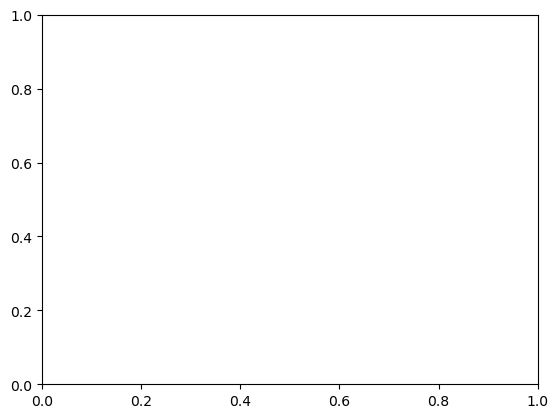

In [8]:
#接下来以一个小规模的图来计算其他特征
g = ig.Graph([(0,1),(0,2),(2,3),(3,4),(4,2),(2,5),(5,0),(6,3),(5,6)])
#获取所有节点的度，返回一个列表，从0，1，2，3，4，5节点分别计数
g.degree()
#度分布直方图
print(g.degree_distribution())
#在igraph==0.10.1版本下会出错
ig.plot(g.degree_distribution(bin_width=1),bbox=(300,300))

In [9]:
#获取邻接矩阵
g.get_adjacency()

Matrix([[0, 1, 1, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 1, 0], [0, 0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0, 0], [1, 0, 1, 0, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0]])

In [10]:
#关联系数
g.assortativity_degree()

-0.18867924528301963

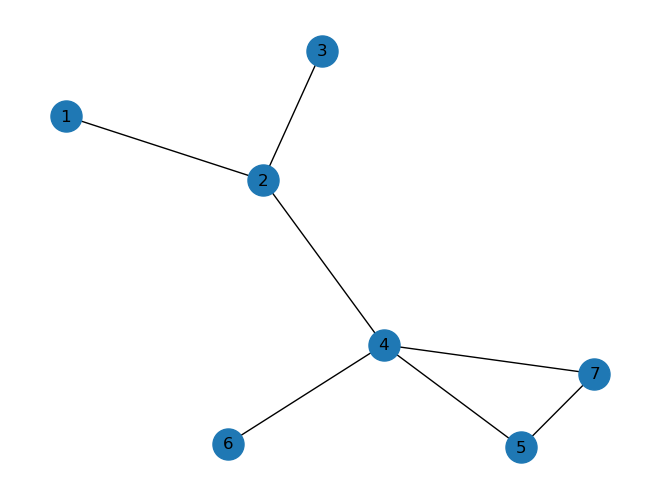

In [11]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7])
G.add_edges_from([(1,2),(2,3),(2,4),(4,5),(4,6),(4,7),(5,7)])
nx.draw(G,node_size=500,with_labels=True)

In [12]:
#以上面的图形为例，展开networkx下的局部集聚系数与全局集聚系数
#平均集聚系数
print(nx.average_clustering(G))
#全局集聚系数
print(nx.transitivity(G))

0.3095238095238096
0.2727272727272727


In [13]:
#在igraph下的局部集聚系数与全局集聚系数
nevg = ig.Graph.from_networkx(G)
#igraph下的平均集聚系数
nevg.transitivity_avglocal_undirected(mode='zero')

0.3095238095238096

In [14]:
# 计算每个节点的局部集聚系数
nevg.transitivity_local_undirected(mode='zero')

# igraph下的全局集聚系数
nevg.transitivity_undirected()
# 计算节点介数中心性
print(g.betweenness())
# 接近度中心性
print(g.closeness())
# 特征向量中心性
g.eigenvector_centrality()
# pagerank中心性
g.pagerank()
# 计算半径
g.diameter()
# 平均最短路径长度
g.average_path_length()
# 计算最短距离矩阵
g.shortest_paths()

[5.0, 0.0, 5.5, 1.5, 0.0, 2.5, 0.5]
[0.6666666666666666, 0.42857142857142855, 0.75, 0.6, 0.5454545454545454, 0.6666666666666666, 0.5454545454545454]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16124\727532558.py:19: DeprecationWarning: Graph.shortest_paths() is deprecated; use Graph.distances() instead
  g.shortest_paths()


[[0, 1, 1, 2, 2, 1, 2],
 [1, 0, 2, 3, 3, 2, 3],
 [1, 2, 0, 1, 1, 1, 2],
 [2, 3, 1, 0, 1, 2, 1],
 [2, 3, 1, 1, 0, 2, 2],
 [1, 2, 1, 2, 2, 0, 1],
 [2, 3, 2, 1, 2, 1, 0]]

0.9.11


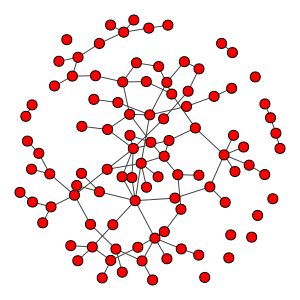

In [5]:
#第六节 图的最大连通子图
import igraph as ig

print(ig.__version__)
g = ig.Graph.Erdos_Renyi(n=100, m=100)
ig.plot(g,vertex_size=10,bbox=(300,300))
#发现外围会有一些孤立的小的节点,中间有一个矩形的连通子团

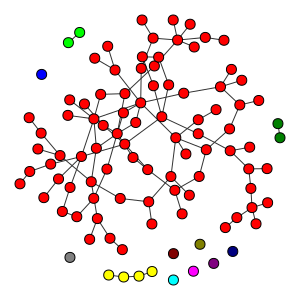

In [6]:
# 可视化连通子图
ig.plot(g.components(), vertex_size=10, bbox=(300, 300))
# ig.plot(g.cnnected_components(),verter_size=10,bbox=(300,300))  #注意早期版本是没有cnnected_components()这个功能的


0.9.11


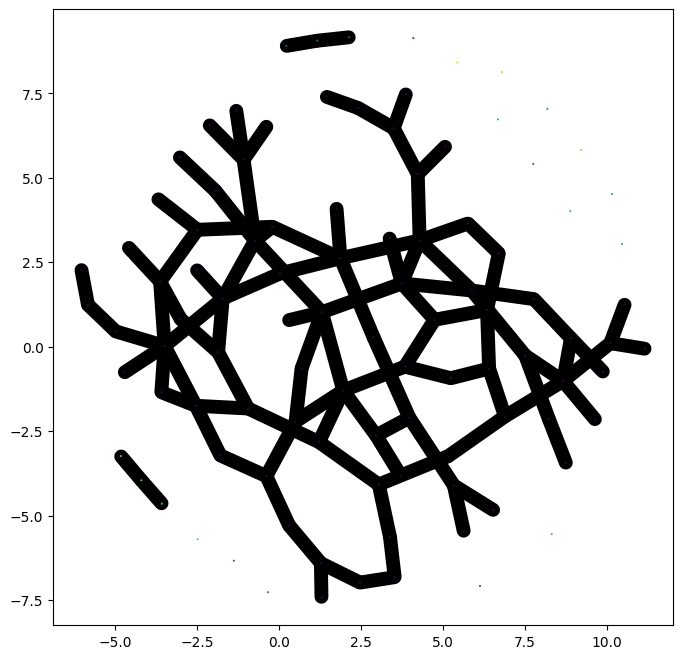

In [1]:
# 接下来我们要对比两个版本做出图的差别
# 突出最大连接子图
import igraph as ig
print(ig.__version__)
g = ig.Graph.Erdos_Renyi(n=100, m=100)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 8))
components = g.components(mode='strong')
# components = g.connected_components(mode='strong')
num_components = len(components)
palette = ig.RainbowPalette(n=num_components)
for i, subgraph in enumerate(components):
    g.vs[subgraph]['color'] = i
    subgraph_edges = g.es.select(_within=subgraph)
    subgraph_edges['color'] = i

ig.plot(
    components,
    palette=palette,
    target=ax,
    vertex_size=0.5,
    edge_width=10.0
)
plt.show()

0.10.1


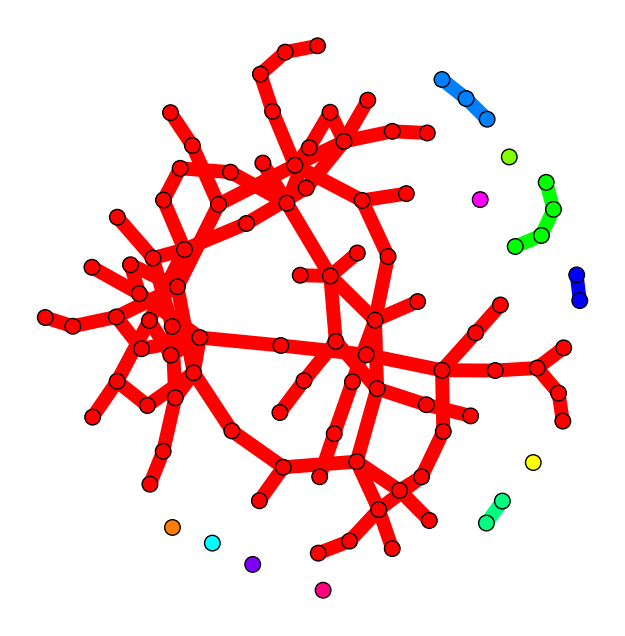

In [9]:
# 接下来我们要对比两个版本做出图的差别
# 突出最大连接子图
import matplotlib.pyplot as plt
import igraph as ig
print(ig.__version__)
g = ig.Graph.Erdos_Renyi(n=100, m=100)
fig, ax = plt.subplots(figsize=(8, 8))
# components = g.components(mode='strong')
components = g.connected_components(mode='strong')
num_components = len(components)
palette = ig.RainbowPalette(n=num_components)
for i, subgraph in enumerate(components):
    g.vs[subgraph]['color'] = i
    subgraph_edges = g.es.select(_within=subgraph)
    subgraph_edges['color'] = i

ig.plot(
    components,
    palette=palette,
    target=ax,
    vertex_size=0.5,
    edge_width=10.0
)
plt.show()
#用红色的连边来加粗显示最大连通子图

In [2]:
#连通子图的数量
len(components)

18

[0, 1, 5, 6, 7, 10, 11, 12, 13, 15, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 47, 51, 52, 54, 55, 56, 57, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 96, 97, 99]


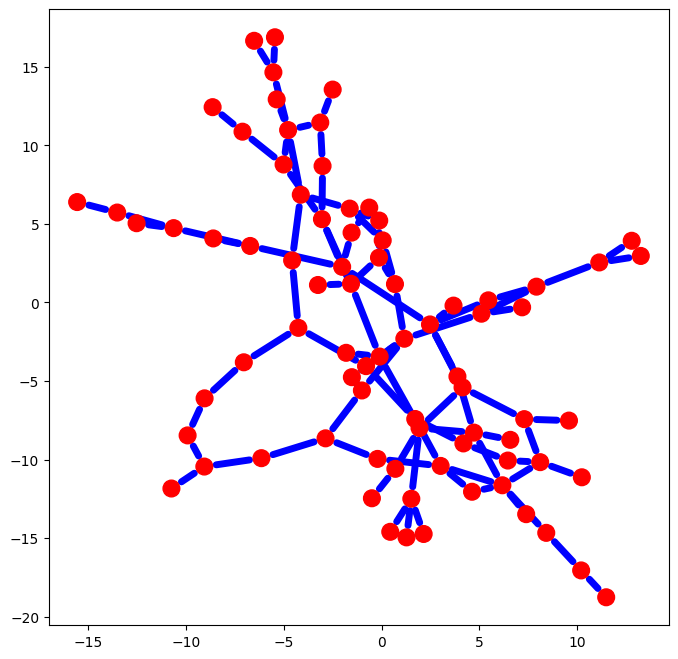

In [8]:
#在0.9那个旧版本下运行,内核换位ipykernel
# 连通子图的数量
len(components)

# 打印最大连通子图包含的节点
print(components[0])  # 仅仅是个数量，不是一个结构
# 获取最大连通子图的节点
LCC = g.induced_subgraph(components[0])
# 可视化最大连通子图
fig, ax = plt.subplots(figsize=(8, 8))
ig.plot(
    LCC,
    target=ax,
    palette=palette,
    vertex_size=12,
    vertex_color='red',
    edge_color='blue',
    edge_width=5.0,
)
plt.show()

0.10.1


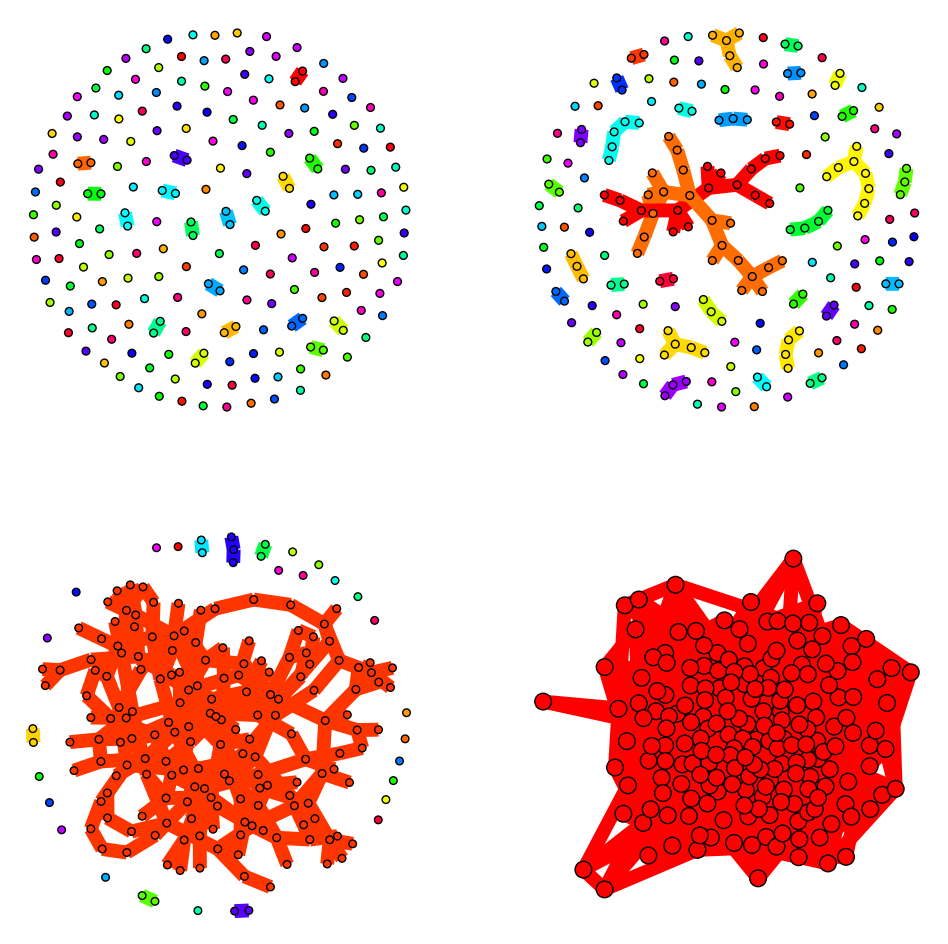

In [4]:
#ER随机网络的演化
import matplotlib.pyplot as plt
import igraph as ig
print(ig.__version__)
n = 200
pvals = [0.001, 0.005, 0.01, 0.05] #第一个概率小于1/n,第二个概率等于1/n,最后两个取比1/n大的概率
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
for j, p in enumerate(pvals):
    g = ig.Graph.Erdos_Renyi(n=n, p=p)
    components = g.connected_components(mode='strong')  # 注意早期版本是没有这个connected_components，所以这段又用0.10这种新版本
    num_components = len(components)
    palette = ig.RainbowPalette(n=num_components)
    for i, subgraph in enumerate(components):
        g.vs[subgraph]['color'] = i
        subgraph_edges = g.es.select(_within=subgraph)
        subgraph_edges['color'] = i
    ig.plot(
        components,
        palette=palette,
        target=axes[j // 2, j % 2],
        vertex_size=0.5,
        edge_width=10.0
    )
plt.show()
#发现连通子图逐渐由无到有，最后几乎生成一个全连通的网络

Text(0, 0.5, '$S(p)$')

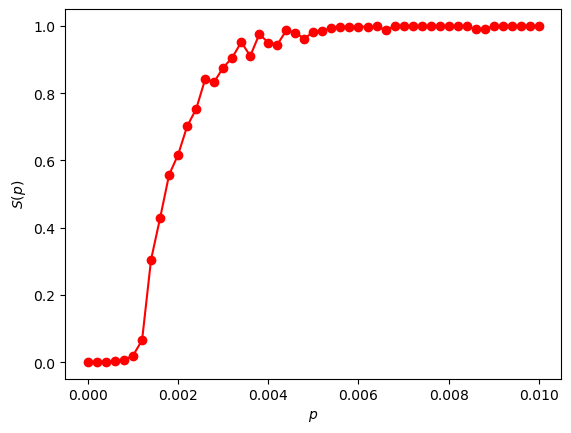

In [6]:
import numpy as np


# ER随机网络中巨大连分量占比S(p),与连边概率p之间的依赖关系
def get_Sp(n, pvals):
    Sp = np.zeros(len(pvals))
    for i, p in enumerate(pvals):
        g = ig.Graph.Erdos_Renyi(n=n, p=p)
        components = g.connected_components(mode='strong')
        # 获得最大连通子图
        LCC = g.induced_subgraph(components[0])
        n_LCC = LCC.vcount()
        Sp[i] = n_LCC / n
    return Sp


iterations = 100 #设置100独立统计的次数
n = 1000
nums = 51
pvals = np.linspace(0, 0.01, nums)
Sp = np.zeros(nums)
for i in range(iterations):
    Sp += get_Sp(n, pvals)

fig, ax = plt.subplots()
ax.plot(pvals, Sp / iterations, 'ro-')
ax.set_xlabel('$p$')
ax.set_ylabel('$S(p)$')
#纵坐标指的是最大连通子图包含节点的数量占整个网络节点的数量的比值
#横坐标指的是连边概率
#发现在0.001附近，S（p）会发生明显的增加

In [9]:
#计算ER随机网络和WS小世界网络的结构特因为其底层实现是用C语言实现的，所以运行效率要高于networkx（底层语言是用纯python编写）的，优势是处理大规模网络
#为什么要学习igraph,若研究大于1000个节点的大规模网络的话，就用igraaph
import igraph as ig
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import time

print(ig.__version__)

#计算这个中心性为例
N,L =5000,40000
t1 =time.perf_counter()
G=nx.gnm_random_graph(N,L)
BC_nx=nx.betweenness_centrality(G)
t2=time.perf_counter()
print('networkx计算所需时间为：',t2-t1)

t1 =time.perf_counter()
g=ig.Graph.Erdos_Renyi(n=N,m=L)
BC_ig=dict(zip(range(N),g.betweenness()))
t2=time.perf_counter()
print('networkx计算所需时间为：',t2-t1)

0.10.1
networkx计算所需时间为： 124.62138800000002
networkx计算所需时间为： 3.5403440000000046


Text(0, 0.5, '$p_k$')

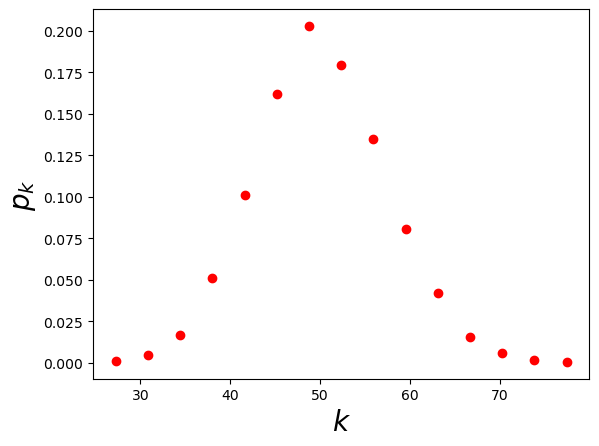

In [10]:
# ER随机网络的度分布，发现服从泊松分布，峰值在网络的平均值附近
N, L = 10000, 250000
avk = 50
nums = 15
samples = 100
x0 = np.zeros(nums)
y0 = np.zeros(nums)
for i in range(samples):
    g= ig.Graph.Erdos_Renyi(n=N,m=L) #核心就是借助这个函数来生成网络
    data =np.array(g.degree())
    class_interval=(max(data)-min(data))/nums   
    hist,bins =np.histogram(data,bins=nums,density=True)
    x=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
    y=hist*class_interval
    x0+=x
    y0+=y
plt.plot(x0/samples,y0/samples,'ro')
plt.xlabel('$k$',fontsize=20)
plt.ylabel('$p_k$',fontsize=20)

In [11]:
##ER随机网络的平均距离，在networkx中，如果网络是不连通的会报错。
N, L = 5000, 250000
GNX = nx.gnm_random_graph(N, L)
# 确保生成的网络是连通的
while not nx.is_connected(GNX):
    GNX = nx.gnm_random_graph(N, L)

gig = ig.Graph.from_networkx(GNX)

# 比较networkx和igraph的效率
t1=time.perf_counter()
spl_nx=nx.average_shortest_path_length(GNX)
t2=time.perf_counter()
print('networkx计算所需要的时间为：',t2-t1)
t3=time.perf_counter()
spl_ig=gig.average_path_length()
t4=time.perf_counter()
print('igraph计算所需要的时间为：',t4-t3)



networkx计算所需要的时间为： 45.3031747
igraph计算所需要的时间为： 2.5007362000001194


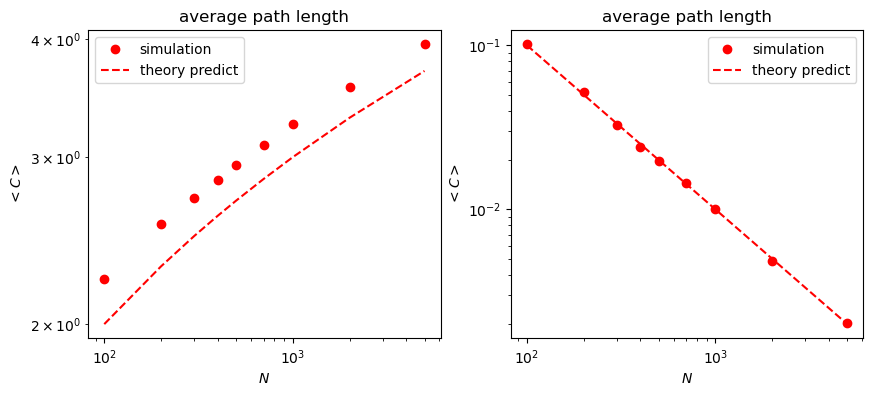

In [16]:
N = [100, 200, 300, 400, 500, 700, 1000, 2000, 5000]
samples = 10 #我们要取很多次统计平均值，这里取10次独立样本下的平均值
avl = []  # 平均最短距离
avc = []  # 平均局部集聚系数
t_avl = []  # 平均距离的理论近似值
t_avc = []  # 平均局部集聚系数的理论近似值

for i, n in enumerate(N):
    s1 = 0
    s2 = 0
    s3 = 0
    s4 = 0
    for i in range(samples):
        g = ig.Graph.Erdos_Renyi(n=n, m=5 * n)
        avk = sum(g.degree()) / n
        s1 += g.average_path_length()
        s2 += np.log(n) / np.log(avk)
        s3 += g.transitivity_avglocal_undirected(mode='zero')
        s4 += avk / n
    avl.append(s1 / samples)
    t_avl.append(s2 / samples)
    avc.append(s3 / samples)
    t_avc.append(s4 / samples)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(N, avl, 'ro', label='simulation')
axs[0].plot(N, t_avl, 'r--', label='theory predict')
axs[0].set_title('average path length')
axs[0].legend(loc=0)
axs[0].set_xlabel('$N$')
axs[0].set_ylabel('$<C>$')
axs[0].set_xscale('log')
axs[0].set_yscale('log')

axs[1].plot(N, avc, 'ro', label='simulation')
axs[1].plot(N, t_avc, 'r--', label='theory predict')
axs[1].set_title('average path length')
axs[1].legend(loc=0)
axs[1].set_xlabel('$N$')
axs[1].set_ylabel('$<C>$')
axs[1].set_xscale('log')
axs[1].set_yscale('log')

In [22]:
# Graph.is_connected()
#对于不连通网络，当unconn设定为True时，返回的是
g=ig.Graph.Erdos_Renyi(n=1000,m=1000)
g.is_connected()

False

In [23]:
g.average_path_length(unconn=True) #计算平均最短路径长度，如果要计算不连通网络的话，要指明参数，返回的就是多个不连通串的最短路径的平均值

8.973711447589885

In [24]:
components = g.components(mode='strong')
# 获得最大连通子图
LCC = g.induced_subgraph(components[0])
LCC.is_connected()
LCC.average_path_length()

8.977052336949509

In [12]:
#第七课 幂律分布与BA无标度网络 ，注意不要使用最新的
import igraph as ig
print(ig.__version__)

0.9.11


In [13]:

# 生成3个BA无标度网络
g1 = ig.Graph.Barabasi(n=100000, m=1)#每次增加一个节点，就与前面的m个节点相连
g2 = ig.Graph.Barabasi(n=100000, m=3)
g3 = ig.Graph.Barabasi(n=100000, m=5)

# 在0.9.11上正常运行
result1=ig.power_law_fit(g1.degree(),method='continuous')
result2=ig.power_law_fit(g2.degree(),method='continuous')
result3=ig.power_law_fit(g3.degree(),method='continuous')


In [14]:
result1 # alpha幂律分布的度分布指数，因为没有统计平均，此处只是一个样本的值，所以与无标度网络的3偏差较大

FittedPowerLaw(continuous=True, alpha=4.245827401205333, xmin=26.0, L=-325.3261533669425, D=0.08333333333333333, p=0.5175506635818691)

In [15]:
result1.alpha

4.245827401205333

In [16]:
result2

FittedPowerLaw(continuous=True, alpha=3.3140541262439682, xmin=49.0, L=-1677.3755218063877, D=0.03208556149732621, p=0.836023918137802)

In [17]:
result2.alpha

3.3140541262439682

In [18]:
result3  #可以看出此时alpha=3.2081236747140074与3越来越接近了，所以做许多个网络样本取平均值，才会使得结果与3越来越接近
# xmin=61.0，集合度分布中，度的最小值；D=0.024489795918367346离合曲线的时候的误差，均方距离

FittedPowerLaw(continuous=True, alpha=3.1343609526191902, xmin=57.0, L=-3816.9868641247112, D=0.0273972602739726, p=0.5830328565918391)

result3.alpha

In [19]:
result3.alpha

3.1343609526191902

In [23]:
import igraph as ig
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def get_degree_distribution(n, m):
    nums = 30
    samples = 1
    x0 = np.zeros(nums)
    y0 = np.zeros(nums)
    for i in range(samples):
        g = ig.Graph.Barabasi(n=n, m=m)
        data = np.array(g.degree())
        class_interval = (max(data) - min(data)) / nums
        hist, bins = np.histogram(data, bins=nums, density=True)
        x = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]
        y = hist * class_interval
        x0 += x
        y0 += y
    return x0 / samples, y0 / samples


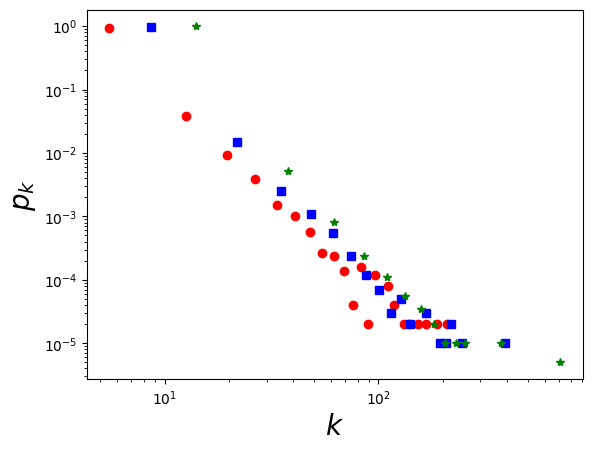

In [24]:
#绘制BA无标度网络，不同BA无标度网络尺寸下的度分布，参数 m相同，发现网络尺寸的变化，不会影响度分布曲线。稍微的偏差是因为只有一个样本，若样本越多，重叠的效果就越好
k1,pk1 = get_degree_distribution(50000,2)
k2, pk2 = get_degree_distribution(100000, 2)
k3, pk3 = get_degree_distribution(200000, 2)
plt.plot(k1,pk1,'ro')
plt.plot(k2,pk2,'bs')
plt.plot(k3,pk3,'g*')
plt.xlabel('$k$',fontsize=20)
plt.ylabel('$p_k$',fontsize=20)
plt.xscale('log')
plt.yscale('log')

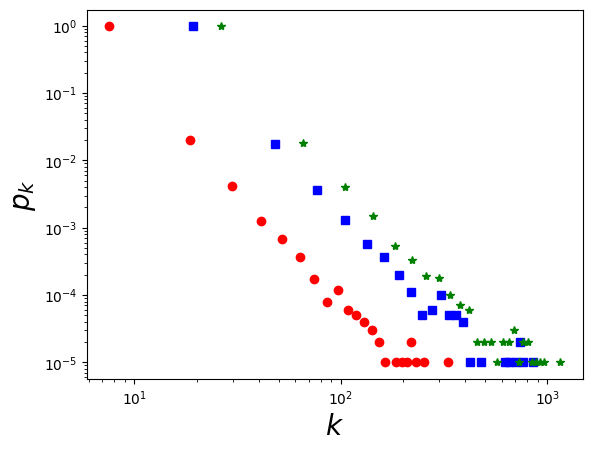

In [27]:
# 不同参数m下的度分布，N相同，发现m发生变化之后，曲线就会发生平移；参数m越大，网络中所有节点的度值越大，度分布的曲线越到右侧，对应得斜率度分布指数gamma近似是一样的
k1, pk1 = get_degree_distribution(100000, 2)
k2, pk2 = get_degree_distribution(100000, 5)
k3, pk3 = get_degree_distribution(100000, 7)

plt.plot(k1,pk1,'ro')
plt.plot(k2,pk2,'bs')
plt.plot(k3,pk3,'g*')
plt.xlabel('$k$',fontsize=20)
plt.ylabel('$p_k$',fontsize=20)
plt.xscale('log')
plt.yscale('log')


In [28]:
#第八集 几种无监督图聚类和社区检测算法（旧版）
import igraph as ig
print(ig.__version__)

0.9.11


In [29]:
# 以著名的扎卡里空手道俱乐部网络为例，一般常用此来检测算法的有效性
g = ig.Graph.Famous('Zachary')

In [30]:
#基于网络边介数的社区检测GN
#思想：连接两个社区的边的介数通常很高，因为在不同社区的节点之间的许多最短路径都要经过它们。因此，我们逐渐去除介数最高的边，并在每次去除后重新计算边介。
#这样，网络迟早会变成独立的组件，聚类的结果将用树状图表示
# 打印树状图，反映的是每一次节点合并的过程
print(g.community_edge_betweenness())




Dendrogram, 34 elements, 33 merges

2 28 27 24 25 31 26 14 15 18 20 22 8 30 23 29 32 33 9 0 1 3 13 7 21 19 17 12 11 5 6 16 4 10
| |  |  |  |  |  |  |  |  |  |  |  | |  |  |  |  |  | | | | |  | |  |  |  |  |  | | |  | |
| |  |  |  |  |  |  |  |  |  |  |  | |  |  |  `--'  | | | | |  | |  |  |  |  |  | | |  | |
| |  |  |  |  |  |  |  |  |  |  |  | |  |  |   |    | | | | |  | |  |  |  |  |  | | |  | |
| |  |  |  `--'  |  |  |  |  |  |  | |  |  `---'    | | | | |  | |  |  |  |  |  | | |  | |
| |  |  |   |    |  |  |  |  |  |  | |  |    |      | | | | |  | |  |  |  |  |  | | |  | |
| |  |  `---'    |  |  |  |  |  |  | |  `----'      | | | | |  | |  |  |  |  |  | `-'  | |
| |  |    |      |  |  |  |  |  |  | |    |         | | | | |  | |  |  |  |  |  |  |   | |
`-'  |    |      |  |  |  |  |  |  | |    |         | | | `-'  | |  |  |  |  |  `--'   `-'
 |   |    |      |  |  |  |  |  |  | |    |         | | |  |   | |  |  |  |  |   |      | 
 |   |    |      |  |  |  |  |  |  | |    |         |

In [31]:
#输出最佳划分结果,发现本例子的最佳结果是分为5个类
com = g.community_edge_betweenness().as_clustering()
print(com)

Clustering with 34 elements and 5 clusters
[0] 0, 1, 3, 7, 11, 12, 13, 17, 19, 21
[1] 2, 24, 25, 27, 28, 31
[2] 4, 5, 6, 10, 16
[3] 8, 14, 15, 18, 20, 22, 23, 26, 29, 30, 32, 33
[4] 9


In [32]:
# 计算模块度
print(ig.Graph.modularity(g,com))

0.40129848783694944


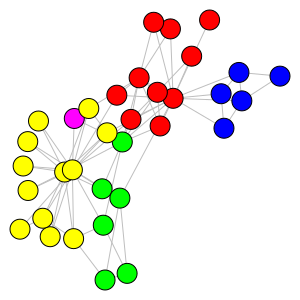

In [33]:
#可视化网络
ig.plot(g.community_edge_betweenness().as_clustering(),
        vertex_size=20,
        edge_width=1,
        edge_color='grey',
        bbox=(300,300), 
        )
#可以看出有5个社群

In [37]:
#贪婪优化算法，简称CNM算法
# 直接调用库函数即可
import igraph as ig
print(ig.__version__)
# 以著名的扎卡里空手道俱乐部网络为例，一般常用此来检测算法的有效性
g = ig.Graph.Famous('Zachary')
print(g.community_fastgreedy())

0.9.11
Dendrogram, 34 elements, 33 merges

18 22 15 8 30 32 24 25 31 28 26 29 33 23 27 14 20 7 3 12 9 2 13 1 17 21 19 16 5 6 0 4 10 11
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |  |  | | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |  `--' | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |   |   | | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |   `---' | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |     |   | | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |     `---' | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |       |   | |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |       `---' |  |
|  |  |  | |  |  |  |  |  |  |  |  |  |  |  |  |  | | |  | | |  | |  |  |         |   |  |
|  |  |  | |  |  |  |  |  |  `--'  |  |  |  | 

In [38]:
#输出最佳划分结果,发现本例子的最佳结果是分为5个类,有树状图转化为聚类
com = g.community_fastgreedy().as_clustering()
print(com)

Clustering with 34 elements and 3 clusters
[0] 0, 4, 5, 6, 10, 11, 16, 19
[1] 1, 2, 3, 7, 9, 12, 13, 17, 21
[2] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33


In [39]:
print(ig.Graph.modularity(g,com))

0.38067061143984227


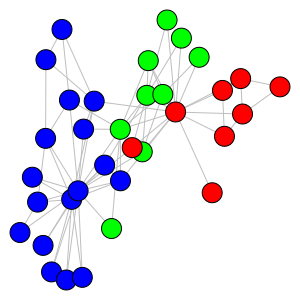

In [40]:
#可视化网络
ig.plot(com,
        vertex_size=20,
        edge_width=1,
        edge_color='grey',
        bbox=(300,300), 
        )

In [41]:
#第三种算法，返回的是聚类结果，不是树状图.根据MR和CTB的infommap方式找到网络的社区结构
com =g.community_infomap()
print(com)

Clustering with 34 elements and 3 clusters
[0] 0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21
[1] 4, 5, 6, 10, 16
[2] 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33


In [42]:
print(ig.Graph.modularity(g,com))

0.40203813280736367


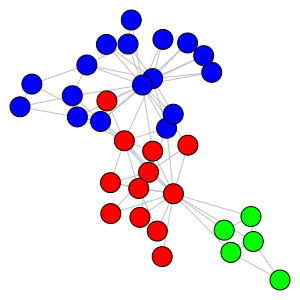

In [43]:
#可视化网络
ig.plot(com,
        vertex_size=20,
        edge_width=1,
        edge_color='grey',
        bbox=(300,300), 
        )

In [44]:
#Louvain算法
com =g.community_multilevel()
print(com)

Clustering with 34 elements and 4 clusters
[0] 0, 1, 2, 3, 7, 9, 11, 12, 13, 17, 19, 21
[1] 4, 5, 6, 10, 16
[2] 8, 14, 15, 18, 20, 22, 26, 29, 30, 32, 33
[3] 23, 24, 25, 27, 28, 31


In [45]:
print(ig.Graph.modularity(g,com))

0.4188034188034188


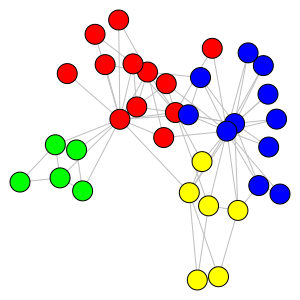

In [46]:
#可视化网络
ig.plot(com,
        vertex_size=20,
        edge_width=1,
        edge_color='grey',
        bbox=(300,300), 
        )

In [54]:
#第九节 官方示例讲解-QuickStart，用的是0.10.1新版本
#快速概述
#1.建立一个图
# 2.设置节点和边的属性
#3.使用matplotlib绘图
#4.将可视化的图保存下来
#5.以.gml图文件的形式导出和导入图形


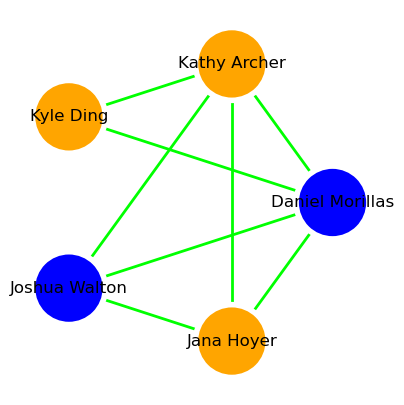

In [2]:
import igraph as ig
import matplotlib.pyplot as plt
#构造一个有5个顶点的图
n_vertices = 5
edges=[(0,1),(0,2),(0,3),(0,4),(1,2),(1,3),(1,4),(3,4)]
g=ig.Graph(n_vertices,edges)
#设置图、节点和边的属性
g['title']='Small Social Network'
g.vs['name']=['Daniel Morillas','Kathy Archer','Kyle Ding','Joshua Walton','Jana Hoyer']
g.vs['gender'] = ['M','F','F','M','F']
g.es['married']=['False','False','False','False','False','False','False','True']
#更改已设置的节点和连边的属性
g.vs[1]['name']='Kathy Archer'
g.es[0]['married'] =True
#借助matplotlib绘图
#注意属性可以全局设置（例如vertex_size）,也可以使用数据单独设置（例如vertex_color）
fig,ax=plt.subplots(figsize=(5,5))
ig.plot(
    g,
    target=ax,
    layout='circle',#设置布局为circular layout
    vertex_size=0.5,
    vertex_color=['blue' if gender =='M' else 'orange' for gender in g.vs['gender']],
    vertex_frame_width = 4.0,
    vertex_frame_color = 'white',
    vertex_label=g.vs['name'],
    vertex_label_size = 12.0,
    edge_width=[2 if married else l for married in g.es['married']],
    edge_color=['lime' if married else 'gray' for married in g.es['married']]
)
plt.show()
#将可视化的图保存为图文件
fig.savefig(r'F:\na\09寒假任务\network_picture\igraph\9.1.png',dpi=300)
fig.savefig(r'F:\na\09寒假任务\network_picture\igraph\9.2.jpg',dpi=300)
fig.savefig(r'F:\na\09寒假任务\network_picture\igraph\9.3.pdf')


<AxesSubplot: >

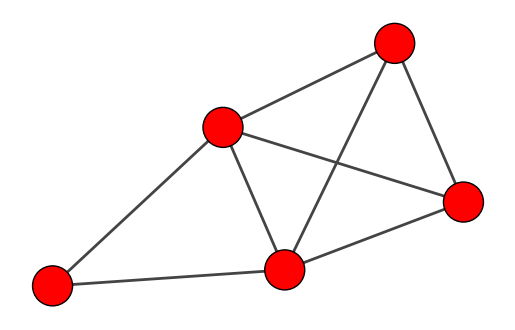

In [4]:
#将图作为gml文件导出和导入
g.save(r'F:\na\09寒假任务\network_picture\igraph\9.4.gml')
g = ig.load(r'F:\na\09寒假任务\network_picture\igraph\9.4.gml')
ig.plot(g,bbox=(300,300))

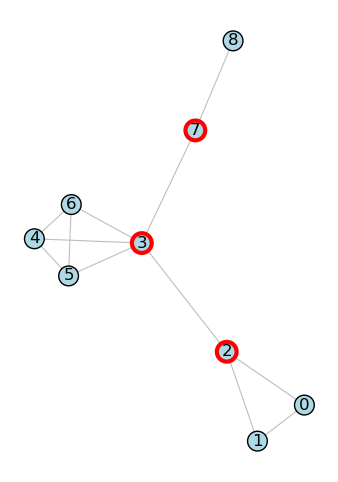

[3, 7, 11]
(2, 3)
(3, 7)
(7, 8)


In [13]:
#第十节 关节点和桥 0.10.1
#定义：如果一个顶点的移除增加了图中连接组件的数量，那么它就是一个连接点（或关节点）。如果边的移除增加了图中（弱）连接分量的数量，那么边就是桥
import igraph as ig
import matplotlib.pyplot as plt
#创建一个图，图公式是图的简单字符串表示形式，它非常方便地快速创建小图形
g = ig.Graph.Formula('0-1-2-0,3:4:5:6-3:4:5:6,2-3-7-8', simplify=True)
# 3:4:5:6-3:4:5:6表示这四个节点在任意一对节点之间都存在边，当simplify = True时，不含自环，否则含有自环
# 找出所有的关节点,就是把这些节点去掉之后，会使得图形分成好几块
articulation_points = g.vs[g.articulation_points()]

fig, ax = plt.subplots(figsize=(6, 6))
ig.plot(
    g,
    target=ax,
    vertex_size=0.3,
    vertex_color='lightblue',
    vertex_label=range(g.vcount()),
    vertex_frame_color=['red' if v in articulation_points else 'black' for v in g.vs],
    vertex_frame_width=[3 if v in articulation_points else 1 for v in g.vs],
    edge_width=0.8,
    edge_color='gray',
)
plt.show()
#可以看出2，3，7就是这里的关节点，用红色的边圈出来
#找出所有的桥
edges = g.get_edgelist()
bridges = g.bridges()
print(bridges)
for index in bridges:
    print(edges[index])



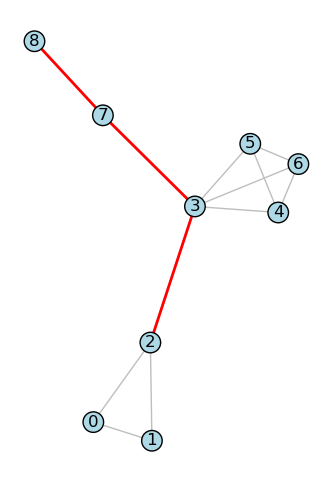

In [14]:
g.es['color'] = 'gray'
g.es[bridges]['color'] = 'red'
g.es['width'] = 1.0
g.es[bridges]['width'] = 2.0

fig, ax = plt.subplots(figsize=(6, 6))
ig.plot(
    g,
    target=ax,
    vertex_size=0.3,
    vertex_color='lightblue',
    vertex_label=range(g.vcount())
)
plt.show()
#断开其他的边，不会增加图的连通子图，这样的边就不是桥

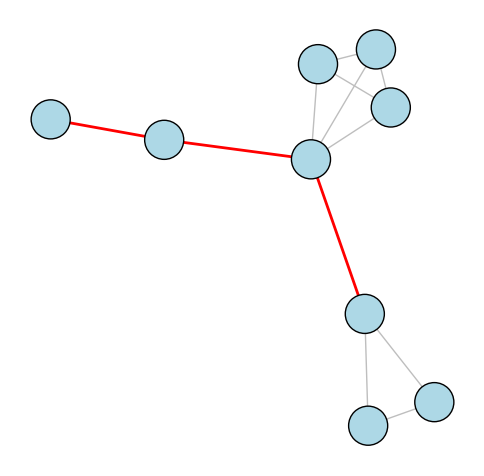

In [18]:
g.es['label'] = ''
g.es[bridges]['label'] = 'x'
fig, ax = plt.subplots(figsize=(6, 6))
ig.plot(
    g,
    target=ax,
    vertex_size=0.5,
    vertex_color='lightblue',
    vetex_label=range(g.vcount()),
    edge_background='#FFF0',  # transparent background color 
    edges_align_label=True,  #确保标签与边对齐
    edges_label=g.es['label'],
    edges_label_color='red'
    
)
plt.show()

In [46]:
#第11课 官方示例讲解-基于介数中心性来绘制网络节点和连边的colormap图
#版本是0.10.1
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig
# 定义一个函数
def plot_betweenness(g, vertex_betweenness, edge_betweenness, ax, cax1, cax2):
    '''Plot vertex/edge betweenness, with colorbars

    Args:
        g: the graph to plot.
        ax: the Axes for the graph
        cax1: the Axes for the vertex betweenness colorbar
        cax2: the Axes for the edge betweenness colorbar
    '''

    # Rescale betweenness to be between 0.0 and 1.0
    scaled_vertex_betweenness = ig.rescale(vertex_betweenness, clamp=True)
    scaled_edge_betweenness = ig.rescale(edge_betweenness, clamp=True)
    print(f"vertices: {min(vertex_betweenness)} - {max(vertex_betweenness)}")
    print(f"edges: {min(edge_betweenness)} - {max(edge_betweenness)}")

    # Define mappings betweenness -> color
    cmap1 = LinearSegmentedColormap.from_list("vertex_cmap", ["pink", "indigo"])
    cmap2 = LinearSegmentedColormap.from_list("edge_cmap", ["lightblue", "midnightblue"])

    # Plot graph
    g.vs["color"] = [cmap1(betweenness) for betweenness in scaled_vertex_betweenness]
    g.vs["size"]  = ig.rescale(vertex_betweenness, (0.1, 0.5))
    g.es["color"] = [cmap2(betweenness) for betweenness in scaled_edge_betweenness]
    g.es["width"] = ig.rescale(edge_betweenness, (0.5, 1.0))
    ig.plot(
        g,
        target=ax,
        layout="fruchterman_reingold",
        vertex_frame_width=0.2,
    )

    # Color bars
    norm1 = ScalarMappable(norm=Normalize(0, max(vertex_betweenness)), cmap=cmap1)
    norm2 = ScalarMappable(norm=Normalize(0, max(edge_betweenness)), cmap=cmap2)
    plt.colorbar(norm1, cax=cax1, orientation="horizontal", label='Vertex Betweenness')
    plt.colorbar(norm2, cax=cax2, orientation="horizontal", label='Edge Betweenness')

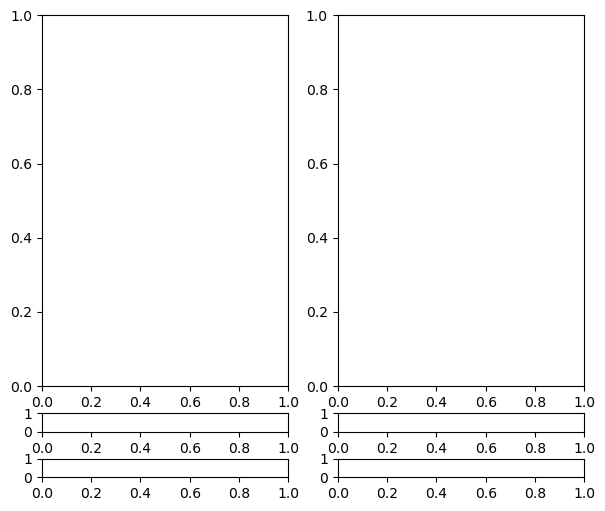

In [49]:
random.seed(0)
g1 = ig.Graph.Famous("Krackhardt_Kite")
vertex_betweenness1 = g1.betweenness()
edge_betweenness1 = g1.edge_betweenness()
g2 = ig.Graph.Watts_Strogatz(dim=1, size=150, nei=2, p=0.1)
vertex_betweenness2 = g2.betweenness()
edge_betweenness2 = g2.edge_betweenness()
fig, axs = plt.subplots(
    3, 2,
    figsize=(7, 6),
    gridspec_kw=dict(height_ratios=(20, 1, 1)),
)

# # #更改为如下两行代码,有问题
# plot_betweenness(g1, axs[0, 0], axs[1, 0], axs[2, 0])
# plot_betweenness(g2, axs[0, 1], axs[1, 1], axs[2, 1])
# fig.tight_layout()
# plt.show()

vertices:-14.0
edges:-14.5


NameError: name 'betweennsess' is not defined

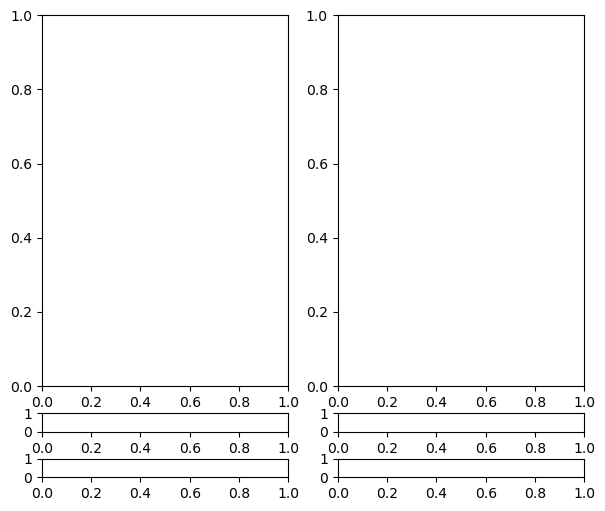

In [34]:
random.seed(0)
g1 = ig.Graph.Famous("Krackhardt_Kite")
vertex_betweenness1 = g1.betweenness()
edge_betweenness1 = g1.edge_betweenness()
g2 = ig.Graph.Watts_Strogatz(dim=1, size=150, nei=2, p=0.1)
vertex_betweenness2 = g2.betweenness()
edge_betweenness2 = g2.edge_betweenness()

fig, axs = plt.subplots(
    3, 2,
    figsize=(7, 6),
    gridspec_kw=dict(height_ratios=(20, 1, 1)),
)
plot_betweenness(g1, axs[0, 0], axs[1, 0], axs[2, 0])
plot_betweenness(g2, axs[0, 1], axs[1, 1], axs[2, 1])
fig.tight_layout()
plt.show()
fig.tight_layout(h_pad=1)
plt.show()

In [50]:
import random
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import LinearSegmentedColormap, Normalize
import igraph as ig
def plot_betweenness(g, vertex_betweenness, edge_betweenness, ax, cax1, cax2):
    '''  
    用颜色条绘制点/边的个数
    参数：
    :param g: 要绘制的图，
    :param ax: 图的坐标轴
    :param cax1: 节点介数色阶条的坐标轴
    :param cax2: 连边介数色阶条的坐标轴
    :return: 

    '''

    # Rescale betweenness to be between 0.0 and 1.0 计算节点和连边的介数，并将其缩放到0.0到1.0之间
    scaled_vertex_betweenness = ig.rescale(vertex_betweenness, clamp=True)
    scaled_edge_betweenness = ig.rescale(edge_betweenness, clamp=True)
    print(f"vertices: {min(vertex_betweenness)} - {max(vertex_betweenness)}")
    print(f"edges: {min(edge_betweenness)} - {max(edge_betweenness)}")

    # Define mappings betweenness -> color  定义介数与颜色之间的映射
    cmap1 = LinearSegmentedColormap.from_list("vertex_cmap", ["pink", "indigo"])
    cmap2 = LinearSegmentedColormap.from_list("edge_cmap", ["lightblue", "midnightblue"])

    # Plot graph
    g.vs["color"] = [cmap1(betweenness) for betweenness in scaled_vertex_betweenness]
    g.vs["size"]  = ig.rescale(vertex_betweenness, (0.1, 0.5))
    g.es["color"] = [cmap2(betweenness) for betweenness in scaled_edge_betweenness]
    g.es["width"] = ig.rescale(edge_betweenness, (0.5, 1.0))
    ig.plot(
        g,
        target=ax,
        layout="fruchterman_reingold",
        vertex_frame_width=0.2,
    )

    # Color bars
    norm1 = ScalarMappable(norm=Normalize(0, max(vertex_betweenness)), cmap=cmap1)
    norm2 = ScalarMappable(norm=Normalize(0, max(edge_betweenness)), cmap=cmap2)
    plt.colorbar(norm1, cax=cax1, orientation="horizontal", label='Vertex Betweenness')
    plt.colorbar(norm2, cax=cax2, orientation="horizontal", label='Edge Betweenness')

vertices: 0.0 - 14.0
edges: 1.5 - 16.0
vertices: 0.0 - 753.8235063912693
edges: 8.951984126984126 - 477.30745059034535


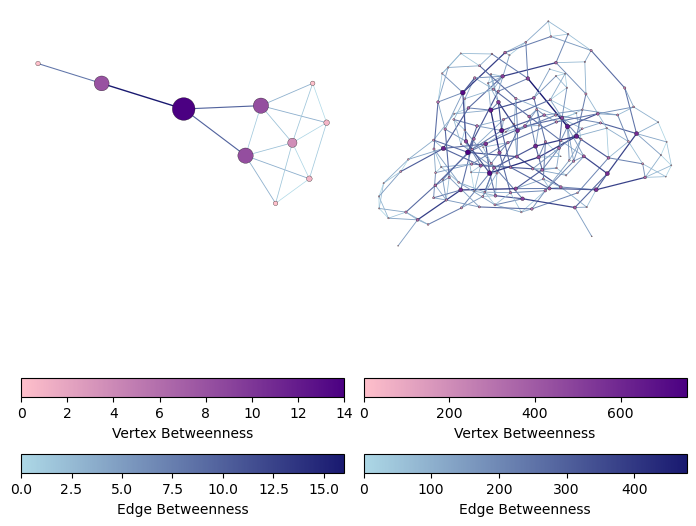

In [51]:
random.seed(0)
g1 = ig.Graph.Famous("Krackhardt_Kite")
vertex_betweenness1 = g1.betweenness()
edge_betweenness1 = g1.edge_betweenness()
g2 = ig.Graph.Watts_Strogatz(dim=1, size=150, nei=2, p=0.1)
vertex_betweenness2 = g2.betweenness()
edge_betweenness2 = g2.edge_betweenness()
fig, axs = plt.subplots(
    3, 2,
    figsize=(7, 6),
    gridspec_kw=dict(height_ratios=(20, 1, 1)),
)
plot_betweenness(g1, vertex_betweenness1, edge_betweenness1, *axs[:, 0])
plot_betweenness(g2, vertex_betweenness2, edge_betweenness2, *axs[:, 1])
fig.tight_layout(h_pad=1)
plt.show()

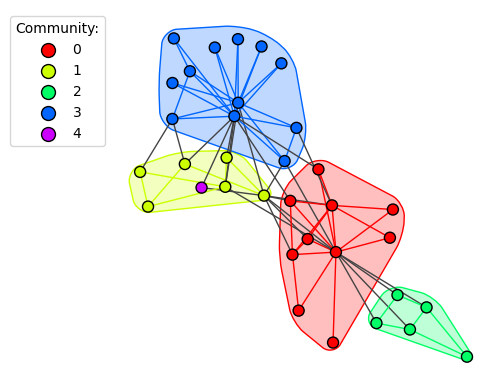

In [65]:
#复杂网络社团的高阶可视化
# 任务需求：网络的社团检测，不同社团的节点用不同的颜色着色，社团内的边与该社团的节点颜色统一，不同社团之间的边用其他颜色着色
# 更高阶的需求：用颜色块覆盖社团中的节点
import igraph as ig
import matplotlib.pyplot as plt

g = ig.Graph.Famous('Zachary')
# Use edge betweenness to detect communities
communities = g.community_edge_betweenness()

# ...and convert into a VertexClustering for plotting
communities = communities.as_clustering()

# Color each vertex and edge based on its community membership
num_communities = len(communities)
palette = ig.RainbowPalette(n=num_communities)
for i, community in enumerate(communities):
    g.vs[community]['color'] = i
    community_edges = g.es.select(_within=community)
    community_edges['color'] = i

# 仅用顶点和边着色绘制
fig, ax = plt.subplots()
ig.plot(
    communities,
    palette=palette,
    edge_width=1,
    target=ax,
    mark_groups=True,
    vertex_size=0.3,
)
# 增加图例
legend_handles=[]
for i in range(num_communities):
    handle = ax.scatter(
        [],[],
        s=100,
        facecolor=palette.get(i),
        edgecolor='k',
        label=i,
    )
    legend_handles.append(handle)
ax.legend(
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0,1.0),
    bbox_transform = ax.transAxes,
    
)

In [58]:
import igraph as ig

print(ig.__version__)

0.10.1


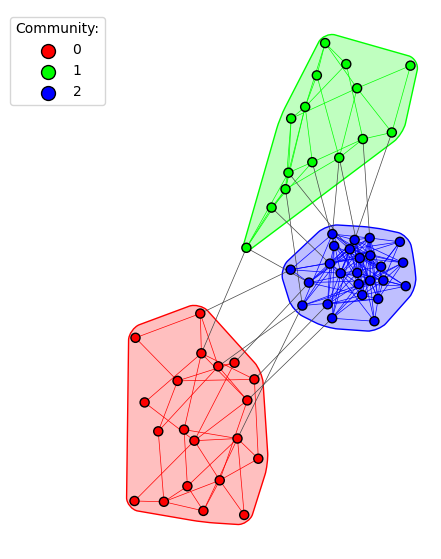

In [64]:
# 再看一个网络可视化结果：随机块网络
n = 60
block_sizes = [20, 15, 25]
pref_matrix = [[0.25, 0.01, 0.01], [0.01, 0.35, 0.02], [0.01, 0.02, 0.40]]
g_SBM = ig.Graph.SBM(n, pref_matrix, block_sizes)
# 设置标签
# g_SBM.vs['label'] = range(len(g.vs))
# ig.plot(g_SBM, bbox=(300, 300))
communities_SBM = g_SBM.community_edge_betweenness()
communities_SBM = communities_SBM.as_clustering()
cn_SBM = len(communities_SBM)
palette = ig.RainbowPalette(n=cn_SBM)
for i, community in enumerate(communities_SBM):
    g_SBM.vs[community]['color'] = i
    communities_edges = g_SBM.es.select(_within=community)
    communities_edges['color'] = i
fig,ax=plt.subplots(figsize=(8,7))
ig.plot(
    communities_SBM,
    vertex_size=0.3,
#     vertex_label=range(g.vcount()),
    mark_groups=True,
    palette=palette,
    edge_width=0.5,
    target=ax,
)

#增加图例
legend_handles=[]
for i in range(cn_SBM):
    handle =ax.scatter(
        [],[],
        s=100,
        facecolor=palette.get(i),
        edgecolor='k',
        label=i,
    )
    legend_handles.append(handle)
ax.legend( 
    handles=legend_handles,
    title='Community:',
    bbox_to_anchor=(0,1.0),
    bbox_transform=ax.transAxes,)
# plt.savefig('community')

In [67]:
)

SyntaxError: unmatched ')' (687023194.py, line 1)